In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
%run -i 'data_pipeline.py'

In [3]:
ratings_df

,movie,critic_score,audience_score,release_date,audience_tomatometer,critic_tomatometer,score_difference
0,The Invisible Man,91,88,"Feb 28, 2020",Fresh,Fresh,-3
1,The Way Back,83,84,"Mar 6, 2020",Fresh,Fresh,1
2,Never Rarely Sometimes Always,99,72,"Mar 13, 2020",Fresh,Fresh,-27
3,Bad Boys for Life,77,96,"Jan 17, 2020",Fresh,Fresh,19
4,Sonic the Hedgehog,64,93,"Feb 14, 2020",Fresh,Fresh,29
...,...,...,...,...,...,...,...
1571,Better Watch Out,89,65,"Oct 6, 2017",Fresh,Fresh,-24
1572,Kaleidoscope,62,36,"Dec 8, 2017",Rotten,Fresh,-26
1573,Kepler's Dream,56,83,"Dec 1, 2017",Fresh,Rotten,27
1574,The Women's Balcony (Ismach Hatani),96,77,"Mar 3, 2017",Fresh,Fresh,-19


Text(0.5, 1.0, 'Audience Rating vs Critic Rating for Movie on Rotten Tomatoes')

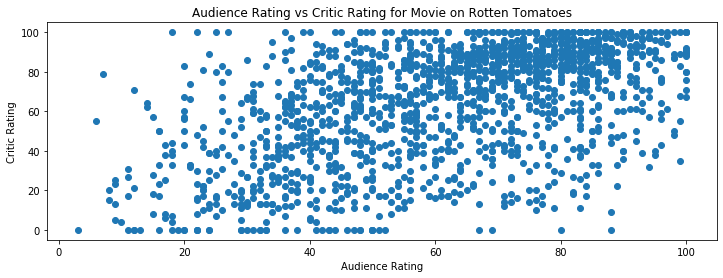

In [4]:
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.scatter(ratings_df['audience_score'],ratings_df['critic_score'])
ax.set_xlabel('Audience Rating')
ax.set_ylabel('Critic Rating')
ax.set_title('Audience Rating vs Critic Rating for Movie on Rotten Tomatoes')

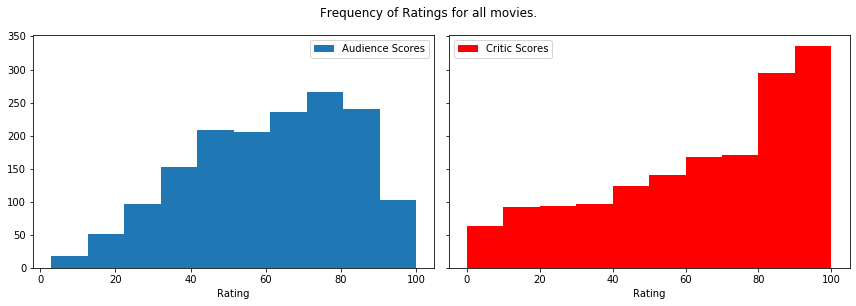

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

ax[0].hist(ratings_df['audience_score'],bins=10,label="Audience Scores")
ax[1].hist(ratings_df['critic_score'],bins=10,label="Critic Scores",color='r')
for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel('Rating')

plt.suptitle('Frequency of Ratings for all movies.',x= 0.5,y=1.05)
plt.tight_layout()

Text(0.5, 1.05, 'Count of Fresh and Rotten Ratings for Audience and Critics')

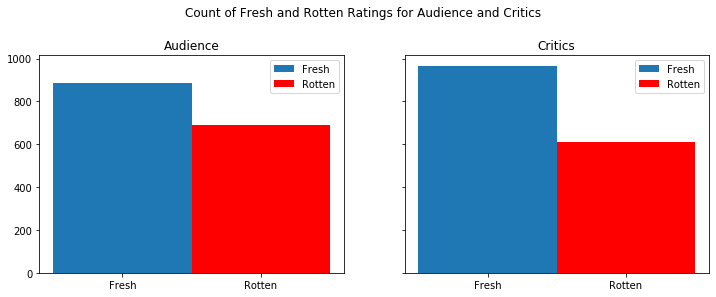

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Fresh'],bins=1,label="Fresh")
ax[0].hist(ratings_df['audience_tomatometer'][ratings_df['audience_tomatometer']=='Rotten'],bins=1,label="Rotten",color='r')
ax[0].legend()
ax[0].set_title('Audience')

ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Fresh'],bins=1,label="Fresh")
ax[1].hist(ratings_df['critic_tomatometer'][ratings_df['critic_tomatometer']=='Rotten'],bins=1,label="Rotten",color='r')
ax[1].legend()
ax[1].set_title('Critics')

plt.suptitle('Count of Fresh and Rotten Ratings for Audience and Critics',x=0.5,y=1.05)

In [7]:
r = pd.DataFrame()
l=['Critics','Audience']
r['Group']=l
r['Average_Rating']= ratings_df['critic_score'].aggregate('average'),ratings_df['audience_score'].aggregate('average')
r

,Group,Average_Rating
0,Critics,63.687183
1,Audience,61.370558


Text(0.5, 1.0, 'Histogram of differences between Audience and Crititc Score for each movie')

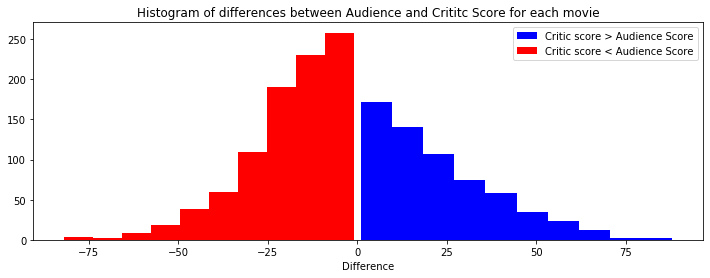

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.hist(ratings_df['score_difference'][ratings_df['score_difference']>0],color='b',label=('Critic score > Audience Score'))
ax.hist(ratings_df['score_difference'][ratings_df['score_difference']<0],color='r',label=('Critic score < Audience Score'))
ax.set_xlabel('Difference')
ax.legend()
ax.set_title("Histogram of differences between Audience and Crititc Score for each movie")

In [16]:
ratings_df['score_difference'][ratings_df['score_difference']==0].count()

31